### Function for check if any bound box value is greater than 1 or less than 0


In [1]:
import pandas as pd
import pyproj
import math

In [2]:
import os
state = "test_bihar"
ratio = "same_class_count_10_120_1000"

In [4]:

label_directory = f"../data/region_performance/{state}_{ratio}/labels"
print(f"Label directory: {label_directory}")
label_files = [f for f in os.listdir(label_directory) if f.endswith('.txt')]
print(f"Number of label files: {len(label_files)}")

def check_bounding_box_values(label_directory, label_files):
    counter = 0
    for label_file in label_files:
        label_path = os.path.join(label_directory, label_file)
        counter=False
        with open(label_path, 'r') as file:
            for line in file:
                parts = line.strip().split()
                # print(parts)
                
                # Extract bounding box coordinates (skip the class label)
                coordinates = list(map(float, parts[1:]))
                # print(coordinates)

                for coord in coordinates:

                    if coord > 1:
                        print(f"Bounding box value {coord} in file {label_file} is greater than 1")
                        counter=True
        if counter:
            counter+=1
    print(f"Number of files with bounding box values greater than 1: {counter}")                


check_bounding_box_values(label_directory, label_files)


Label directory: ../data/region_performance/test_bihar_same_class_count_10_120_1000/labels
Number of label files: 687
Number of files with bounding box values greater than 1: False


In [5]:
txt_files = [f for f in os.listdir(label_directory) if f.endswith('.txt')]
print(f"Number of text files: {len(txt_files)}")
df=pd.DataFrame(columns=['id','class','height_of_box','width_of_box','area','raw_bb_box','bb_box','geometry'])
display(df)

Number of text files: 687


,id,class,height_of_box,width_of_box,area,raw_bb_box,bb_box,geometry


In [6]:
image_size=640
latlon_to_webmercator = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
resolution_per_pixel = 4.77

for txt_file in txt_files:
    file_path = os.path.join(label_directory, txt_file)
    with open(file_path,'r') as file:
        lines=file.readlines()
        for line in lines:
            parts=line.split()
            class_name=parts[0]
            x1,y1,x2,y2,x3,y3,x4,y4=map(float,parts[1:])
            raw_bb_box=[x1,y1,x2,y2,x3,y3,x4,y4]

            x1=x1*image_size
            x2=x2*image_size
            x3=x3*image_size
            x4=x4*image_size
            y1=y1*image_size
            y2=y2*image_size
            y3=y3*image_size
            y4=y4*image_size

            lat1,lon1=latlon_to_webmercator.transform(y1,x1)
            lat2,lon2=latlon_to_webmercator.transform(y2,x2)
            lat3,lon3=latlon_to_webmercator.transform(y3,x3)
            lat4,lon4=latlon_to_webmercator.transform(y4,x4)

            width_pixels=math.sqrt((x2-x1)**2+(y2-y1)**2)
            height_pixels=math.sqrt((x4-x1)**2+(y4-y1)**2)
            width_meters=width_pixels*resolution_per_pixel
            height_meters=height_pixels*resolution_per_pixel

            # width = ((lat1 - lat2)**2 + (lon1 - lon2)**2)**0.5
            # height = ((lat1 - lat4)**2 + (lon1 - lon4)**2)**0.5


            area=width_meters*height_meters

            bb_box=[x1,y1,x2,y2,x3,y3,x4,y4]
            geometry=[(lat1,lon1),(lat2,lon2),(lat3,lon3),(lat4,lon4)]
            raw_data={'id':txt_file,
                          'class':class_name,
                          'height_of_box':height_meters,
                          'width_of_box':width_meters,
                          'area':area,
                          'raw_bb_box':raw_bb_box,
                          'bb_box':bb_box,
                        'geometry': {'type': 'Polygon', 'coordinates': [[(x1, y1), (x2, y2), (x3, y3), (x4, y4)]]}  
                        }
            row_df = pd.DataFrame([raw_data])
            df = pd.concat([df, row_df], ignore_index=True)



/tmp/ipykernel_2199421/4015019140.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, row_df], ignore_index=True)


In [7]:
display(df.head(10))


,id,class,height_of_box,width_of_box,area,raw_bb_box,bb_box,geometry
0,9730741_2910108.txt,1,104.334314,48.136129,5022.249957,"[0.369577, 0.985985, 0.377332, 0.972256, 0.347...","[236.52928, 631.0304, 241.49248, 622.24384, 22...","{'type': 'Polygon', 'coordinates': [[(236.5292..."
1,9386775_2885342.txt,1,38.463049,88.147517,3390.422236,"[0.182027, 0.745513, 0.185195, 0.716813, 0.172...","[116.49727999999999, 477.12832, 118.5248, 458....","{'type': 'Polygon', 'coordinates': [[(116.4972..."
2,9386775_2885342.txt,1,47.992312,103.056619,4945.925433,"[0.023794, 0.569691, 0.03479, 0.537774, 0.0199...","[15.228159999999999, 364.60223999999994, 22.26...","{'type': 'Polygon', 'coordinates': [[(15.22815..."
3,9417044_2811045.txt,1,93.536512,41.023368,3837.182752,"[0.87898, 0.480235, 0.892123, 0.483035, 0.8984...","[562.5472, 307.35040000000004, 570.95872, 309....","{'type': 'Polygon', 'coordinates': [[(562.5472..."
4,9417044_2811045.txt,1,99.586215,47.257182,4706.163930,"[0.096771, 0.591361, 0.099902, 0.576201, 0.068...","[61.93344, 378.47104, 63.93728, 368.76864, 43....","{'type': 'Polygon', 'coordinates': [[(61.93344..."
5,9474830_3033936.txt,1,88.384828,37.683167,3330.620210,"[0.57766, 0.932641, 0.581847, 0.921029, 0.5546...","[369.70239999999995, 596.8902400000001, 372.38...","{'type': 'Polygon', 'coordinates': [[(369.7023..."
6,9306974_2877087.txt,1,47.836752,112.991606,5405.151499,"[0.342551, 0.330548, 0.346483, 0.293745, 0.330...","[219.23264, 211.55072, 221.74912, 187.99679999...","{'type': 'Polygon', 'coordinates': [[(219.2326..."
7,9306974_2877087.txt,1,82.406061,40.702827,3354.159647,"[0.099995, 0.29041, 0.101742, 0.277192, 0.0750...","[63.9968, 185.8624, 65.11488, 177.402879999999...","{'type': 'Polygon', 'coordinates': [[(63.9968,..."
8,9306974_2877087.txt,1,41.119802,94.719254,3894.836988,"[0.286699, 0.178955, 0.292197, 0.148419, 0.278...","[183.48736, 114.5312, 187.00608, 94.98816, 178...","{'type': 'Polygon', 'coordinates': [[(183.4873..."
9,9397782_2827556.txt,1,43.036863,91.598614,3942.117015,"[0.957793, 0.368073, 0.967951, 0.33984, 0.9547...","[612.98752, 235.56671999999998, 619.48864, 217...","{'type': 'Polygon', 'coordinates': [[(612.9875..."


In [8]:
csv_directory = f"../result_csv/{state}_{ratio}_label_stats.csv"
df.to_csv(csv_directory, index=False)
print(f"CSV file saved to {csv_directory}")

CSV file saved to ../result_csv/test_bihar_same_class_count_10_120_1000_label_stats.csv


In [9]:
#find the mean of the area of the bounding box
mean_area=df['area'].mean()
print(f"Mean area of bounding box {state}: {mean_area:.2f} meter square pixels")

Mean area of bounding box test_bihar: 5018.41 meter square pixels


In [29]:
state = "test_bihar"
csv_directory = f"../result_csv/{state}_{ratio}_label_stats.csv"
print(f"CSV file saved to {csv_directory}")


CSV file saved to ../result_csv/test_bihar_same_class_count_10_120_1000_label_stats.csv


In [30]:
df=pd.read_csv(csv_directory)
overall_df=pd.DataFrame(columns=['state','mean_area','mean_height','mean_width','class','count','class_wise_mean','class_mean_height','class_mean_width'])
mean_area=df['area'].mean()
class_count=df['class'].value_counts()
class_names=class_count.index.tolist()
print(class_names)
mean_height=df['height_of_box'].mean()
mean_width=df['width_of_box'].mean()
print(mean_height)
print(mean_width)
class_wise_mean= df.groupby('class')['area'].mean()
print(class_wise_mean)
class_wise_mean_height= df.groupby('class')['height_of_box'].mean()
print(class_wise_mean_height)
class_wise_mean_width= df.groupby('class')['width_of_box'].mean()
print(class_wise_mean_width)


[2, 1, 0]
88.05648005965112
61.64797538178053
class
0    4283.346203
1    4440.255330
2    5095.142289
Name: area, dtype: float64
class
0    65.209531
1    74.249074
2    89.941838
Name: height_of_box, dtype: float64
class
0    65.291473
1    67.909148
2    60.860200
Name: width_of_box, dtype: float64


In [31]:
class_count = df['class'].value_counts()
class_wise_mean = df.groupby('class')['area'].mean()
class_wise_mean_height = df.groupby('class')['height_of_box'].mean()
class_wise_mean_width = df.groupby('class')['width_of_box'].mean()

rows = []

for class_name in class_count.index:
    rows.append({
        'state': state,
        'mean_area': mean_area,
        'mean_height': mean_height,
        'mean_width': mean_width,
        'class': class_name,
        'count': class_count[class_name],
        'class_wise_mean': class_wise_mean[class_name],
        'class_mean_height': class_wise_mean_height[class_name],
        'class_mean_width': class_wise_mean_width[class_name]
    })

overall_df = pd.DataFrame(rows)

display(overall_df)

,state,mean_area,mean_height,mean_width,class,count,class_wise_mean,class_mean_height,class_mean_width
0,test_bihar,5018.412735,88.05648,61.647975,2,1000,5095.142289,89.941838,60.860200
1,test_bihar,5018.412735,88.05648,61.647975,1,120,4440.255330,74.249074,67.909148
2,test_bihar,5018.412735,88.05648,61.647975,0,10,4283.346203,65.209531,65.291473


In [32]:
# overall_df.to_csv(f"../result_csv/overall_label_stats.csv", index=False)
overall_df_path=f"../result_csv/overall_{ratio}label_stats.csv"
print(f"Overall label stats saved to {overall_df_path}")

Overall label stats saved to ../result_csv/overall_same_class_count_10_120_1000label_stats.csv


In [33]:
# overall_df_path='../result_csv/overall_label_stats.csv'

if not os.path.exists(overall_df_path):
    overall_df=overall_df
    overall_df.to_csv(overall_df_path,index=False)
else:
    existing_df=pd.read_csv(overall_df_path)
    overall_df=pd.concat([existing_df,overall_df],ignore_index=True)
    overall_df.to_csv(overall_df_path,index=False)



In [34]:
data=pd.read_csv(overall_df_path)
bihar_mean_area=data[data['state']=='bihar']['mean_area'].mean()
print(bihar_mean_area)
data['mean_area_diff_from_bihar'] = data['mean_area'] - bihar_mean_area
display(data)

5048.108324168641


,state,mean_area,mean_height,mean_width,class,count,class_wise_mean,class_mean_height,class_mean_width,mean_area_diff_from_bihar,mAP,distance_from_bihar
0,uttar_pradesh,6606.312821,93.924797,77.112507,2,1000,6616.915584,94.659083,76.211022,1558.204497,0.535879,482.201235
1,uttar_pradesh,6606.312821,93.924797,77.112507,1,120,6360.049965,87.933709,83.472612,1558.204497,0.535879,482.201235
2,uttar_pradesh,6606.312821,93.924797,77.112507,0,10,8501.190802,92.389197,90.939763,1558.204497,0.535879,482.201235
3,bihar,5048.108324,88.776915,61.331676,2,1000,5131.594289,90.497198,60.780688,0.000000,NaN,0.000000
4,bihar,5048.108324,88.776915,61.331676,1,120,4432.250038,76.515241,65.778596,0.000000,NaN,0.000000
5,bihar,5048.108324,88.776915,61.331676,0,10,4089.811234,63.888725,63.067459,0.000000,NaN,0.000000
6,punjab,7606.830731,113.675913,69.450640,2,1000,7563.595552,112.620357,69.499241,2558.722407,0.506449,1191.342548
7,punjab,7606.830731,113.675913,69.450640,1,120,7967.123891,122.472210,69.045631,2558.722407,0.506449,1191.342548
8,haryana,8567.245902,123.082538,72.876685,2,1000,8613.030535,124.103388,71.996249,3519.137578,0.497329,1019.284241
9,haryana,8567.245902,123.082538,72.876685,1,120,8203.123455,114.935049,80.145662,3519.137578,0.497329,1019.284241


In [35]:
distance_dict = {
    'west_bengal': 354.3959902915622,
    'uttar_pradesh': 482.2012348652302,
    'haryana': 1019.2842410866616,
    'punjab': 1191.3425476426733,
    'bihar': 0,
    'test_bihar': None

}
data['distance_from_bihar'] = data['state'].apply(lambda x: distance_dict[x])
display(data)

,state,mean_area,mean_height,mean_width,class,count,class_wise_mean,class_mean_height,class_mean_width,mean_area_diff_from_bihar,mAP,distance_from_bihar
0,uttar_pradesh,6606.312821,93.924797,77.112507,2,1000,6616.915584,94.659083,76.211022,1558.204497,0.535879,482.201235
1,uttar_pradesh,6606.312821,93.924797,77.112507,1,120,6360.049965,87.933709,83.472612,1558.204497,0.535879,482.201235
2,uttar_pradesh,6606.312821,93.924797,77.112507,0,10,8501.190802,92.389197,90.939763,1558.204497,0.535879,482.201235
3,bihar,5048.108324,88.776915,61.331676,2,1000,5131.594289,90.497198,60.780688,0.000000,NaN,0.000000
4,bihar,5048.108324,88.776915,61.331676,1,120,4432.250038,76.515241,65.778596,0.000000,NaN,0.000000
5,bihar,5048.108324,88.776915,61.331676,0,10,4089.811234,63.888725,63.067459,0.000000,NaN,0.000000
6,punjab,7606.830731,113.675913,69.450640,2,1000,7563.595552,112.620357,69.499241,2558.722407,0.506449,1191.342548
7,punjab,7606.830731,113.675913,69.450640,1,120,7967.123891,122.472210,69.045631,2558.722407,0.506449,1191.342548
8,haryana,8567.245902,123.082538,72.876685,2,1000,8613.030535,124.103388,71.996249,3519.137578,0.497329,1019.284241
9,haryana,8567.245902,123.082538,72.876685,1,120,8203.123455,114.935049,80.145662,3519.137578,0.497329,1019.284241


In [36]:
mAP = {
    'west_bengal': 0.502281,
    'uttar_pradesh': 0.535879,
    'haryana': 0.497329,
    'punjab': 0.506449,
    'test_bihar': 0.594605,
    'bihar':  None

}
data['mAP'] = data['state'].apply(lambda x: mAP[x])
display(data.style.background_gradient(cmap='viridis', subset=['mean_area','mean_area_diff_from_bihar', 'distance_from_bihar', 'mAP']))

,state,mean_area,mean_height,mean_width,class,count,class_wise_mean,class_mean_height,class_mean_width,mean_area_diff_from_bihar,mAP,distance_from_bihar
0,uttar_pradesh,6606.312821,93.924797,77.112507,2,1000,6616.915584,94.659083,76.211022,1558.204497,0.535879,482.201235
1,uttar_pradesh,6606.312821,93.924797,77.112507,1,120,6360.049965,87.933709,83.472612,1558.204497,0.535879,482.201235
2,uttar_pradesh,6606.312821,93.924797,77.112507,0,10,8501.190802,92.389197,90.939763,1558.204497,0.535879,482.201235
3,bihar,5048.108324,88.776915,61.331676,2,1000,5131.594289,90.497198,60.780688,0.000000,nan,0.000000
4,bihar,5048.108324,88.776915,61.331676,1,120,4432.250038,76.515241,65.778596,0.000000,nan,0.000000
5,bihar,5048.108324,88.776915,61.331676,0,10,4089.811234,63.888725,63.067459,0.000000,nan,0.000000
6,punjab,7606.830731,113.675913,69.450640,2,1000,7563.595552,112.620357,69.499241,2558.722407,0.506449,1191.342548
7,punjab,7606.830731,113.675913,69.450640,1,120,7967.123891,122.472210,69.045631,2558.722407,0.506449,1191.342548
8,haryana,8567.245902,123.082538,72.876685,2,1000,8613.030535,124.103388,71.996249,3519.137578,0.497329,1019.284241
9,haryana,8567.245902,123.082538,72.876685,1,120,8203.123455,114.935049,80.145662,3519.137578,0.497329,1019.284241


In [37]:
data.to_csv(overall_df_path, index=False)

In [38]:
#make data data frame with only state and mean_area_diff_from_bihar and mAP
data_hypothesis=data[['state','mean_area','distance_from_bihar','mAP']]
display(data_hypothesis)

,state,mean_area,distance_from_bihar,mAP
0,uttar_pradesh,6606.312821,482.201235,0.535879
1,uttar_pradesh,6606.312821,482.201235,0.535879
2,uttar_pradesh,6606.312821,482.201235,0.535879
3,bihar,5048.108324,0.000000,NaN
4,bihar,5048.108324,0.000000,NaN
5,bihar,5048.108324,0.000000,NaN
6,punjab,7606.830731,1191.342548,0.506449
7,punjab,7606.830731,1191.342548,0.506449
8,haryana,8567.245902,1019.284241,0.497329
9,haryana,8567.245902,1019.284241,0.497329


In [39]:
#drop the duplicate rows
data_hypothesis.drop_duplicates(inplace=True)
display(data_hypothesis)

/tmp/ipykernel_2199421/1125470569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hypothesis.drop_duplicates(inplace=True)


,state,mean_area,distance_from_bihar,mAP
0,uttar_pradesh,6606.312821,482.201235,0.535879
3,bihar,5048.108324,0.000000,NaN
6,punjab,7606.830731,1191.342548,0.506449
8,haryana,8567.245902,1019.284241,0.497329
11,west_bengal,4394.694267,354.395990,0.502281
14,test_bihar,5018.412735,NaN,0.594605


In [40]:
#sort the rows based on mean_area_diff_from_bihar
data_hypothesis=data_hypothesis.sort_values(by='mAP',ascending=False)
display(data_hypothesis.style.background_gradient(cmap='viridis', subset=['mean_area','distance_from_bihar', 'mAP']))

,state,mean_area,distance_from_bihar,mAP
14,test_bihar,5018.412735,nan,0.594605
0,uttar_pradesh,6606.312821,482.201235,0.535879
6,punjab,7606.830731,1191.342548,0.506449
11,west_bengal,4394.694267,354.395990,0.502281
8,haryana,8567.245902,1019.284241,0.497329
3,bihar,5048.108324,0.000000,nan


posx and posy should be finite values
posx and posy should be finite values


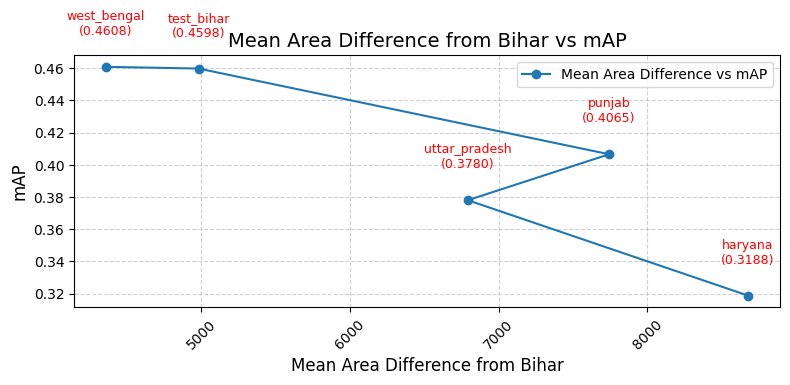

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(data_hypothesis['mean_area'], data_hypothesis['mAP'], '-o', label='Mean Area Difference vs mAP')

plt.xticks(rotation=45)

# Annotate each point with the state name
for i in range(data_hypothesis.shape[0]):
    x = data_hypothesis['mean_area'].iloc[i]
    y = data_hypothesis['mAP'].iloc[i]
    state = data_hypothesis['state'].iloc[i]
    plt.text(
        x=x, 
        y=y + 0.02,  
        s=f"{state}\n({y:.4f})", 
        fontsize=9,
        ha='center',
        color='red'
    )


plt.xlabel('Mean Area Difference from Bihar', fontsize=12)
plt.ylabel('mAP', fontsize=12)
plt.title('Mean Area Difference from Bihar vs mAP', fontsize=14)


plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

